# 셀레늄

## 학습목표

웹브라우저가 필요한 상황에서 셀레늄을 이용해 스크래핑하는 방법을 알아본다

## 최근의 웹 트렌드

- HTML + 프로그램(JavaScript)
- 웹 페이지의 내용이 동적으로 변화
- 단순히 HTML만 긁어서 내용 파악이 불가능

## 트립어드바이저

https://www.tripadvisor.co.kr/Restaurant_Review-g294197-d1371740-Reviews-Mugyodong_Bugeokukjib-Seoul.html

- 리뷰의 모든 내용은 '더보기' 버튼을 클릭해야 볼 수 있음
- 개발자 도구에서 Network를 확인해보면 더보기 버튼 클릭시 통신이 이뤄지며 리뷰 내용을 가져오는 것을 확인

## 리뷰 수집 방법

1. '더보기' 버튼을 클릭했을 때 통신 내역을 requests로 따라한다
2. 웹 브라우저를 띄워서 '더보기' 버튼을 클릭한다

## 셀레늄
- **웹 브라우저 제어 도구**
- 원래는 웹 사이트 자동 테스트를 위한 목적
- 웹 사이트에 requests 등으로 긁기 어려운 부분이 있을 때 활용
- <u>속도는 느림</u>
- [파이썬 doc](https://selenium-python.readthedocs.io/)
- [자바 참조](https://www.popit.kr/web-scraping-by-selenium/)

## 셀레늄 설치

In [1]:
!pip install selenium

## 드라이버

브라우저별로 '드라이버'가 필요

  1. 셀레늄 홈페이지 https://www.seleniumhq.org/
  2. Download 탭 이동
  3. 필요한 드라이버 링크 선택 - 코름
  4. All versions available in Downloads 에서 Downloads 클릭
  5. 크롬 버전에 맞는 드라이버 다운 (구글에서 my user agent 치면 나온다.)    
      >Current Releases    
      >  If you are using Chrome version 74, please download ChromeDriver 74.0.3729.6                          
      > If you are using Chrome version 73, please download ChromeDriver 73.0.3683.68     
      > If you are using Chrome version 72, please download ChromeDriver 2.46 or ChromeDriver 72.0.3626.69     
      > For older version of Chrome, please see below for the version of ChromeDriver that supports it.
  6. 압축파일 풀면 있는 exe 프로그램있는데 **현재 주피터 노트북 파일(소스코드) 있는 폴더로 옮겨 놓는다.** 또는 적당한 폴더에 저장후 환경변수 Path에 추가한다.

파이썬  --------- 크롬드라이버(웹브라우저제어드러이버) --------------  크롬
위 경로에  하단에 Browser 에서 Google Chrome driver 선택

## 크롬 드라이버

- 인터넷 익스플로러는 셀레늄과 문제가 있음
- 구글 크롬(Chrome) 사용을 추천
  1. 셀레늄 홈페이지에서 Google Chrome Driver를 클릭
  2. Latest Release 링크를 클릭
  3. Chrome Driver X.XX 링크를 클릭
  4. 운영체제(win, mac, linux)에 맞는 파일을 다운로드
  5. 압축을 해제
  6. chromedriver.exe 파일을 현재 작업 폴더로 복사
      - 또는 path를 잡으면 된다. (chromedriver.exe가 있는 경로까지만)

## 코딩패턴
1. 브라우저 객체 생성
    - `browser = Chrome()`
1. 페이지 이동
    - browser.get("url")
1. 원하는 DOM elements 조회
    - find_elements_by_css_selector('selector') 등 find 메소드 사용
    - node 하나 찾는 것과 여러개 찾는 것 주의해서 사용 (find_element_xxxx, find_element**s** )
1. 원하는 작업 처리
    - javascript 호출 함수 (ex: click())
    - text content 조회 (node.text)
    - 태그 속성 조회
    - etc


- <font color='blue'>모든 것을 코드로 제어할 필요 없다.</font>
    - 웹 브라우져가 뜨므로 거기서 할 수도 있다. (로그인이라든가 하는 것들)
    - 반복적인 작업은 코드로 제어하고 한번만 해야 하는 작업 같은 것은 직접 제어해도 된다. (편한 대로)

## 크롬 브라우저 띄우기

In [2]:
from selenium.webdriver import Chrome

In [3]:
import os
os.getcwd()

'C:\\Users\\kgmyh\\OneDrive\\문서\\_2018_2019 진행 수업\\2019.07.03_08.23-여름청취\\소스코드\\청취 프로그래밍 소스\\03_크롤링\\Web_Scraping'

In [4]:
browser = Chrome()
# browser = Chrome(os.getcwd() + '/chromedirver')  맥은 크롬드라이버 있는 경로를 알려줘야 한다. (환경변수에서 잡으면 되지 ㅇ낳을까.)

크롬이 뜨면서 **Chrome이 자동화된 테스트 소프트웨어에 의해 제어되고 있습니다**라고 표시

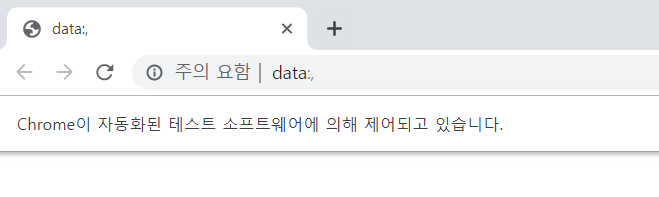

## 주소 이동

In [5]:
url = 'https://www.tripadvisor.co.kr/Restaurant_Review-g294197-d1371740-Reviews-Mugyodong_Bugeokukjib-Seoul.html'
browser.get(url)

In [20]:
# url = 'http://www.naver.com'
# browser.get(url)

## 링크 찾기
- 댓글을 보면 다 안나오고 일부만 나온 뒤 더보기 버튼이 있다. 이상태에서 긁으면 그 형태대로만 나온다. 
- **더보기를 클릭한 다음 내용이 다 나오면 긁기** : **Javascript** 실행하기
- `find_elements_by_css_selector`로 '더보기' 링크를 찾는다. 
  - 단수형 `find_element_~`: 첫번째를 찾음
  - 복수형 `find_elements_~`: 모두 찾음(`lxml.html`의 `cssselect`와 동일)
  

In [6]:
more_links = browser.find_elements_by_css_selector('.ulBlueLinks')

In [8]:
more_links

[<selenium.webdriver.remote.webelement.WebElement (session="0fc95cc65e4fc1ba25e5666d4cb6c537", element="b4400a83-b1e6-4061-a968-4668402cf7b3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0fc95cc65e4fc1ba25e5666d4cb6c537", element="7e2ebf4e-1003-4274-9c33-48e968114360")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0fc95cc65e4fc1ba25e5666d4cb6c537", element="23317748-749e-45a9-97f9-02dbe756d0de")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0fc95cc65e4fc1ba25e5666d4cb6c537", element="90820650-892f-4a57-b6d5-b1a38ea676dc")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0fc95cc65e4fc1ba25e5666d4cb6c537", element="9bd8f65d-bcb1-416f-b584-5f03975240a8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0fc95cc65e4fc1ba25e5666d4cb6c537", element="fdfb1285-1c98-4eb1-885b-2bd9e98287f2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="0fc95cc65e4fc1ba25e5666d4cb6c537", element="f5448e50-478c-4cc2-95ee-fa

## 클릭

`.click()` 메소드로 클릭

In [7]:
# 숨기기도 같은 class이긴 한데 위에서 찾은 것과 class만 같지 다른 element객체이다. 
# 그러므로 browser.find_elements_by_css_selector('.ulBlueLinks') 를 다시 해야한다.
for link in more_links:  # 모든 링크를
    try:
        link.click()     # 하나씩 클릭한다
    except Exception as e:              # 예외가 발생하면
        #print(e) 
        pass # 넘어간다

## 리뷰

- `.text`로 텍스트 확인
- `lxml.html`의 `.text_content()`와 동일

In [10]:
reviews = browser.find_elements_by_css_selector('.partial_entry') # 리뷰 써있는 부분

In [11]:
for review in reviews:
    print(review.text)
    print("-"*50)

술 마신 다음날 숙취에는 최고입니다. 부드러운 북어살과 푸짐한 계란에 고소한 북...더 보기
--------------------------------------------------
50년 된 북어국집 기본적으로 긴줄은 거쳐야 먹을 수 있다 단 회전율이 좋아 오래 기다리지는 않는다 맛있는 북어국을 먹을 수 있다
--------------------------------------------------
음식 맛이 훌륭합니다. 리필도 해주고 밑반찬과 메인의 어울림이 좋습니다.
줄을 서는 사람들을 위해 뭔가 좀 더 케어가 있으면 좋을 것 같습니다.
--------------------------------------------------
옛 선조들이 몸이 힘 들고 허 할 때, 북어를 푹 끊여 15일 이상 먹으면, 기운이 나고, 몸에 독소도 나간다고 하였다.

광화문에서 20년 근무를 하면서 일주일에 한번은 꼭 먹으러 다녔던 곳 입니다.

메뉴를 고를 필요도 없고, 한 그릇으로 모자라면 건더기 국물을 계속 더 요청 할 수 있습니다.
물론, 눈치 주지 않고 당연하다는 듯이 직원들도 가져다 주며, 국물, 건더기를 다먹기 전에
먼저 물어봅니다.

와이프와 저는 주말 아침에 일어나 편안한 트레이닝 차림에 가서 아침을 먹고, 길 건너
스타벅스에서 커피 한잔을 마시고, 청계천 걷다 집으로 돌아오곤 했습니다.

근처 호텔에 머무르시는 분들은 꼭 가보세요. 건강한 음식을 먹는 기분일 겁니다
--------------------------------------------------
언제나 줄서서 먹는 북어국이다. 타이밍을 잘맞우면 조금만 기다려도 된다. 단일메뉴여서 들어만가면 바로 맛있는 북어국을 먹을 수 있다. 개인적으로 북어국도 좋은데 오이지무침이 정말 짱이다.
--------------------------------------------------
건더기가 아주 많이 들어가있고, 재료의 조화가 매우 훌륭하다. 일요일 오전 10시에 방문했는데 가게앞에 줄이 길게 서 있었다. 

In [12]:
data = []
for review in reviews:
    data.append(review.text)
    print(review.text)
    
import pandas as pd
pd.DataFrame({'text':data}).to_csv("리뷰.csv", encoding='euc-kr')

술 마신 다음날 숙취에는 최고입니다. 부드러운 북어살과 푸짐한 계란에 고소한 북...더 보기
50년 된 북어국집 기본적으로 긴줄은 거쳐야 먹을 수 있다 단 회전율이 좋아 오래 기다리지는 않는다 맛있는 북어국을 먹을 수 있다
음식 맛이 훌륭합니다. 리필도 해주고 밑반찬과 메인의 어울림이 좋습니다.
줄을 서는 사람들을 위해 뭔가 좀 더 케어가 있으면 좋을 것 같습니다.
옛 선조들이 몸이 힘 들고 허 할 때, 북어를 푹 끊여 15일 이상 먹으면, 기운이 나고, 몸에 독소도 나간다고 하였다.

광화문에서 20년 근무를 하면서 일주일에 한번은 꼭 먹으러 다녔던 곳 입니다.

메뉴를 고를 필요도 없고, 한 그릇으로 모자라면 건더기 국물을 계속 더 요청 할 수 있습니다.
물론, 눈치 주지 않고 당연하다는 듯이 직원들도 가져다 주며, 국물, 건더기를 다먹기 전에
먼저 물어봅니다.

와이프와 저는 주말 아침에 일어나 편안한 트레이닝 차림에 가서 아침을 먹고, 길 건너
스타벅스에서 커피 한잔을 마시고, 청계천 걷다 집으로 돌아오곤 했습니다.

근처 호텔에 머무르시는 분들은 꼭 가보세요. 건강한 음식을 먹는 기분일 겁니다
언제나 줄서서 먹는 북어국이다. 타이밍을 잘맞우면 조금만 기다려도 된다. 단일메뉴여서 들어만가면 바로 맛있는 북어국을 먹을 수 있다. 개인적으로 북어국도 좋은데 오이지무침이 정말 짱이다.
건더기가 아주 많이 들어가있고, 재료의 조화가 매우 훌륭하다. 일요일 오전 10시에 방문했는데 가게앞에 줄이 길게 서 있었다. 우리는 포장을 했지만 회전율이 좋은 편이라 기다린다 하더라도 금방 먹을 수는 있을 것 같았다.
인근에 회사들이 밀집해있기 때문에, 전날 과음을 한 직장인들이 아주 많이 찾는 곳이다.
해장에 북어국만한게 없다.! 여기에 가려면 좀 이른 시간에 가는 것이 좋을 것 같다.
외국남친이 하도 가보고 싶어해서 같이 찾아가봤어요. 국물은 굉장히 깔끔했고 밥에 새우를 얹어 먹었는데 그것도 꽤 맛있었고요. 반찬으로 나오는 오이짱아치가 아주 마음에 들었어요. 해장이 필요

## 셀레늄 문서

https://selenium-python.readthedocs.io